In [8]:
#Prerequisite
import sys
#!{sys.executable} -m pip install tweepy
#!{sys.executable} -m pip install pymongo
#!{sys.executable} -m pip install wordcloud
#!{sys.executable} -m pip install stop_words
#!{sys.executable} -m pip install nltk
#!{sys.executable} -m pip install textblob
#!{sys.executable} -m pip install googletrans
#!{sys.executable} -m pip install py_translator==2.1.9
#!{sys.executable} -m pip install emoji
#!{sys.executable} -m pip install ipywidgets
#!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install re
#Above code is for running for the first time. Uncomment and execute them

  ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [22]:
import numpy as np
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
import pymongo
import ipywidgets as wgt
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
import re
from datetime import datetime

%matplotlib inline

In [23]:
api_key = "pCRLPdf2lkjpRX9Uczpt2gVBb" # <---- Add your API Key
api_secret = "G1Wv7sTLMYF3cr5LbL8S9uj2g2LFrdWp8X8t7Ft3sIpW0kbqgD" # <---- Add your API Secret
access_token = "100875722-ZCFQUY8B7OOAgVb3bDrgwUdLc3r5PEaeNl1dgNqc" # <---- Add your access token
access_token_secret = "nwYOTVCY59yXx12iveDeShAHolH0zAcKF87jg2Q2ESLZy" # <---- Add your access token secret

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)
col = pymongo.MongoClient()["delhielection2020"]["Modi290120"]
col.count()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  # This is added back by InteractiveShellApp.init_path()


0

In [24]:
class MyStreamListener(tweepy.StreamListener):
    
    counter = 0
    
    def __init__(self, max_tweets=3000, *args, **kwargs):
        self.max_tweets = max_tweets
        self.counter = 0
        super().__init__(*args, **kwargs)
    
    def on_connect(self):
        self.counter = 0
        self.start_time = datetime.now()
    
    def on_status(self, status):
        # Increment counter
        self.counter += 1
        
        # Store tweet to MongoDB
        col.insert_one(status._json)
        
        
        if self.counter % 1 == 0:
            value = int(100.00 * self.counter / self.max_tweets)
            mining_time = datetime.now() - self.start_time
            progress_bar.value = value
            html_value = """<span class="label label-primary">Tweets/Sec: %.1f</span>""" % (self.counter / max([1,mining_time.seconds]))
            html_value += """ <span class="label label-success">Progress: %.1f%%</span>""" % (self.counter / self.max_tweets * 100.0)
            html_value += """ <span class="label label-info">ETA: %.1f Sec</span>""" % ((self.max_tweets - self.counter) / (self.counter / max([1,mining_time.seconds])))
            wgt_status.value = html_value
            #print("%s/%s" % (self.counter, self.max_tweets))
            if self.counter >= self.max_tweets:
                myStream.disconnect()
                print("Finished")
                print("Total Mining Time: %s" % (mining_time))
                print("Tweets/Sec: %.1f" % (self.max_tweets / mining_time.seconds))
                progress_bar.value = 0
                
    
myStreamListener = MyStreamListener(max_tweets=3000)
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)
keywords = ["2020",
            "Delhi Election","Kejriwal",""
           ]

# Visualize a progress bar to track progress
progress_bar = wgt.IntProgress(value=0)
display(progress_bar)
wgt_status = wgt.HTML(value="""<span class="label label-primary">Tweets/Sec: 0.0</span>""")
display(wgt_status)

# Start a filter with an error counter of 20
for error_counter in range(20):
    try:
        myStream.filter(track=keywords)
        print("Tweets collected: %s" % myStream.listener.counter)
        print("Total tweets in collection: %s" % col.count())
        break
    except:
        print("ERROR# %s" % (error_counter + 1))

IntProgress(value=0)

HTML(value='<span class="label label-primary">Tweets/Sec: 0.0</span>')

Finished
Total Mining Time: 0:02:50.355291
Tweets/Sec: 17.6
Tweets collected: 3000
Total tweets in collection: 3000


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere


In [25]:
col.find_one()

{'_id': ObjectId('5e3118d7d49474243c8f4b60'),
 'created_at': 'Wed Jan 29 05:32:01 +0000 2020',
 'id': 1222391929763008512,
 'id_str': '1222391929763008512',
 'text': 'RT @jenjira_gg: มาค่ะช่วยกันวันเกิดน้องแจ๊คกี้\n1รี=1บาท\nตั้งแต่วันนี้ถึง 17 ก.พ. 63  21:00 นะคะ\nเปิดรี19วันตามอายุน้องงงงงง ถ้ายอดรีไม่ถึง…',
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1112376215757684737,
  'id_str': '1112376215757684737',
  'name': 'F4th🖤',
  'screen_name': 'pyd04_',
  'location': None,
  'url': None,
  'description': 'greenery4th_💚',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 55,
  'friends_count': 95,
  'listed_count': 0,
  'favourites_count': 7267,
  'statuses_count': 15694,
  'created_at': 'Sun 

In [26]:
dataset = [{"created_at": item["created_at"],
            "text": item["text"],
            "user": "@%s" % item["user"]["screen_name"],
            "source": item["source"],
            "lang":item["lang"],
            
           } for item in col.find()]

dataset = pd.DataFrame(dataset)
#from googletrans import Translator
#translator=Translator()
#dataset.text=translator.translate(dataset.text)
dataset

,created_at,lang,source,text,user
0,Wed Jan 29 05:32:01 +0000 2020,th,"<a href=""http://twitter.com/download/iphone"" r...",RT @jenjira_gg: มาค่ะช่วยกันวันเกิดน้องแจ๊คกี้...,@pyd04_
1,Wed Jan 29 05:32:01 +0000 2020,en,"<a href=""http://twitter.com/download/android"" ...",RT @btsvotingteam: Drop your votes on Boy With...,@btsgirl13_
2,Wed Jan 29 05:32:01 +0000 2020,th,"<a href=""http://twitter.com/download/iphone"" r...",RT @buffsiam: มกรา 2020 มึงเปิดตัวปังมาก แล้วอ...,@lanakimtae
3,Wed Jan 29 05:32:01 +0000 2020,es,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...","RT @angel_munarriz: Ahora toca abrir ""Delegaci...",@almajefi
4,Wed Jan 29 05:32:01 +0000 2020,ja,"<a href=""https://tapbots.com/software/tweetbot...",RT @otakulawyer: 弘中先生は元弁護人として刑事訴訟法105条の押収拒絶権を行...,@katoSat
5,Wed Jan 29 05:32:01 +0000 2020,en,"<a href=""http://twitter.com/download/iphone"" r...",RT @SenCoryGardner: The US intelligence commun...,@Keung58969459
6,Wed Jan 29 05:32:01 +0000 2020,en,"<a href=""http://twitter.com/download/iphone"" r...",RT @AWAKEALERT: Yes the criminals are known \n...,@rogersurfacings
7,Wed Jan 29 05:32:01 +0000 2020,en,"<a href=""https://vnnsports.net/"" rel=""nofollow...",New Story: Wrestling Rams Go 2-1 with Wins Ove...,@LadueActivities
8,Wed Jan 29 05:32:01 +0000 2020,ja,"<a href=""https://cocolo.jp"" rel=""nofollow"">FM ...",オンエア曲[2020/01/29 14:30]\n飛んでイスタンブール / 庄野真代\n#f...,@fmcocoloonair
9,Wed Jan 29 05:32:01 +0000 2020,it,"<a href=""http://www.zazoom.it/"" rel=""nofollow""...",Meteo Roma domani giovedì 30 gennaio: cieli s...,@zazoomblog


In [27]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(dataset.text)

word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
word_count["count"] = count_matrix.sum(axis=0).tolist()[0]
word_count = word_count.sort_values("count", ascending=False).reset_index(drop=True)
word_count[:50]

,word,count
0,rt,2387
1,https,1406
2,co,1355
3,2020,1167
4,the,737
5,to,441
6,of,397
7,in,340
8,for,269
9,and,244


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


SocialDog for Twitter       9
IFTTT                      10
TweetDeck                  10
Twitter Web Client         45
WordPress.com              49
Zapier.com                 66
Twitter for iPad           75
Twitter Web App           365
Twitter for iPhone       1081
Twitter for Android      1154
Name: source, dtype: int64

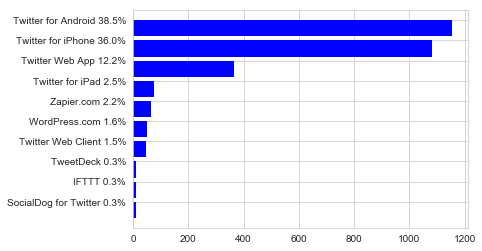

In [28]:
def get_source_name(x):
    value = re.findall(pattern="<[^>]+>([^<]+)</a>", string=x)
    if len(value) > 0:
        return value[0]
    else:
        return ""
dataset.source_name = dataset.source.apply(get_source_name)

source_counts = dataset.source_name.value_counts().sort_values()[-10:]

bottom = [index for index, item in enumerate(source_counts.index)]
plt.barh(bottom, width=source_counts, color="blue", linewidth=0)

y_labels = ["%s %.1f%%" % (item, 100.0*source_counts[item]/len(dataset)) for index,item in enumerate(source_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)

source_counts

ar       34
fr       38
pt       47
ko      123
und     129
in      142
es      164
th      236
ja      556
en     1313
Name: lang, dtype: int64

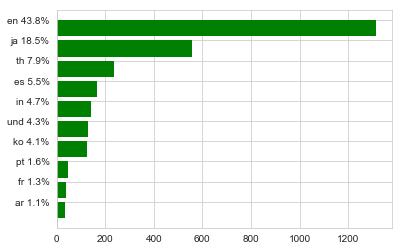

In [29]:
lang_counts = dataset.lang.value_counts().sort_values()[-10:]
bottom = [index for index, item in enumerate(lang_counts.index)]
plt.barh(bottom, width=lang_counts, color="green", linewidth=0)
y_labels = ["%s %.1f%%" % (item, 100.0*lang_counts[item]/len(dataset)) for index,item in enumerate(lang_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)
lang_counts

In [30]:
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from  textblob import TextBlob

In [31]:
dataset1 = [{"id": item["id"],
            "text": item["text"],
            "lang":item["lang"],
            
           } for item in col.find()]

dataset1 = pd.DataFrame(dataset1)

is_dataset1=dataset1.lang=="en"
dataset1=dataset1[is_dataset1]
dataset1

,id,lang,text
1,1222391929691889664,en,RT @btsvotingteam: Drop your votes on Boy With...
5,1222391930127933441,en,RT @SenCoryGardner: The US intelligence commun...
6,1222391930052599810,en,RT @AWAKEALERT: Yes the criminals are known \n...
7,1222391930249547776,en,New Story: Wrestling Rams Go 2-1 with Wins Ove...
11,1222391930471907329,en,"RT @Ripple: ""The global economy will see conti..."
12,1222391930417340416,en,RT @edieconstantine: Spot on!!! Where is the o...
13,1222391930413252609,en,Police Release Photo Of Individual Wanted In C...
16,1222391930669146114,en,Alica Schmidt - German track star &amp; ‘World...
17,1222391930668994561,en,RT @richa_TNIE: Classic case of @moefcc shifti...
19,1222391930853765120,en,RT @meccafilm: Come out this Thursday at 7pm t...


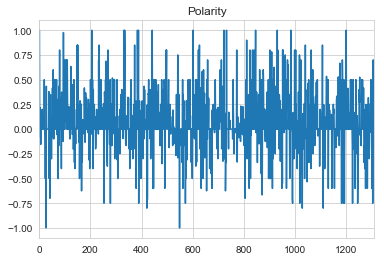

In [32]:

tweettext=dataset1['text']
wordlist=pd.DataFrame();

polarity=[]
subj=[]

for t in tweettext:
    tx= TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

poltweet= pd.DataFrame({'polarity':polarity,'subjectivity':subj})
poltweet.polarity.plot(title='Polarity')
plt.show()

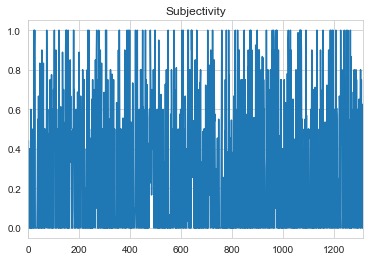

In [33]:
poltweet.subjectivity.plot(title='Subjectivity')
plt.show()

In [34]:
import statistics
statistics.mean(poltweet.polarity)

0.061083638764165234

In [35]:
import statistics
statistics.mean(poltweet.subjectivity)

0.30746899543786443

In [36]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [37]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re
top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = dataset1['text'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)
nltk.download('stopwords')
#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)
word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


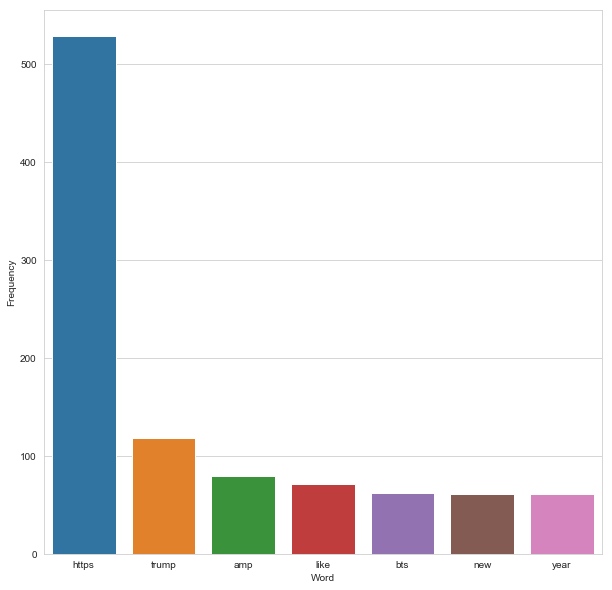

In [38]:
import seaborn as sns
# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

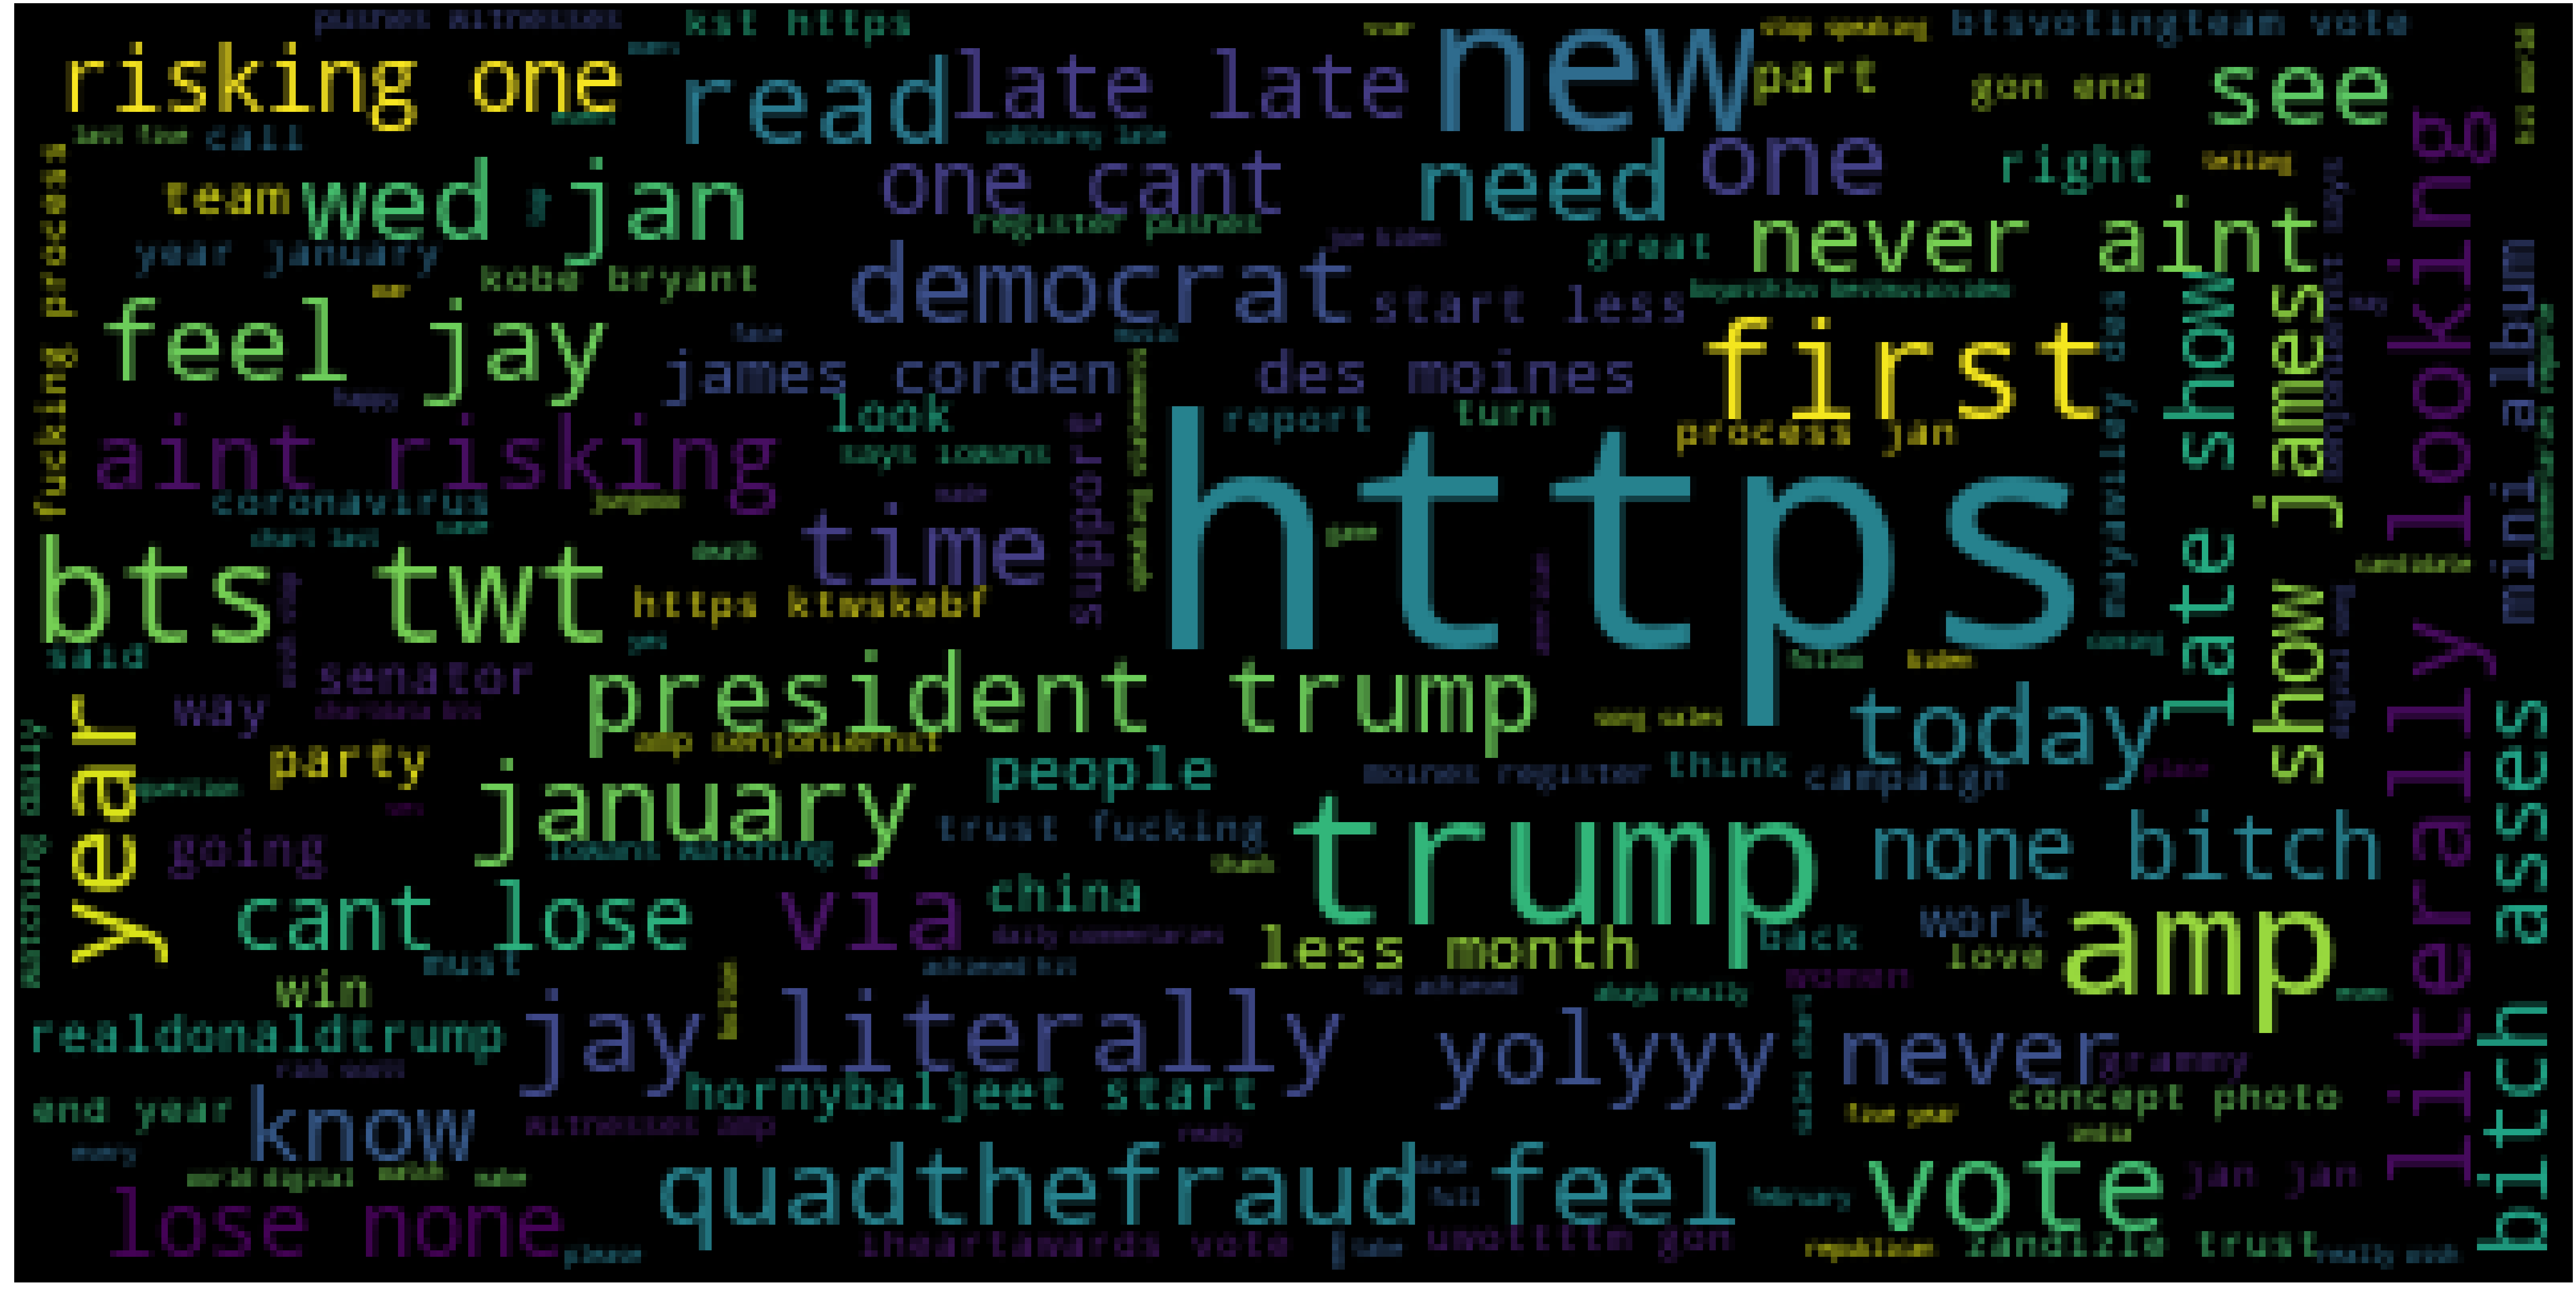

In [39]:
wc(cleaned_data_title,'black','Common Words' )

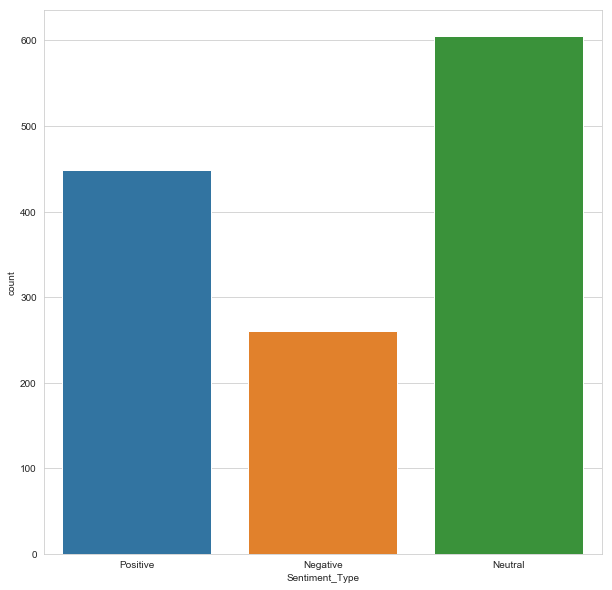

In [40]:
from textblob import TextBlob

bloblist_desc = list()

twit=dataset1['text'].astype(str)
for row in twit:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    twit_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
    
def f(twit_polarity_desc):
    if twit_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif twit_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

twit_polarity_desc['Sentiment_Type'] = twit_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=twit_polarity_desc)

In [41]:
import collections, numpy as np
a=twit_polarity_desc.Sentiment_Type
neut=np.count_nonzero(a == 'Neutral')
pos=np.count_nonzero(a == 'Positive')
neg=np.count_nonzero(a == 'Negative')
popularity='{0:.2f}'.format((((neut*0.5)+(pos)+(neg*0))/(neut+pos+neg))*100)
popularity

'57.16'